### Probabilistic Biostatistics Examples: BHM
Code snippets to reproduce the Bayesian hierarchical model example in the paper and presentation.

In [20]:
# Turing.jl BHM for binomial trials
using Turing, MCMCChains, Plots, StatsPlots, LaTeXStrings
@model binomial_trials(s,n) = begin
    g = length(n)  # number of groups
    # hierarchical priors
    ω ~ Beta(2,3)
    K ~ Gamma(10,1/0.05)
    a = ω*K + 1.0
    b = (1.0 - ω)*K + 1.0
    # priors for each occurrence rate
    θ = Array{Real}(undef, g)
    for k in 1:g
        θ[k] ~ Beta(a,b)
    end
    # likelihood
    for i in 1:g
        s[i] ~ Binomial(n[i],θ[i])
    end
end

binomial_trials (generic function with 3 methods)

In [2]:
# data used in example for Figures 3-5
# Placebo:
sn_pcbo = [3 11; 4 37; 8 65; 10 76; 2 150]
# Treatment:
sn_treat = [6 11; 7 37; 17 63; 23 133; 11 159]

sp = sn_pcbo[:,1];
np = sn_pcbo[:,2];
st = sn_treat[:,1];
nt = sn_treat[:,2];

In [19]:
Turing.turnprogress(false);
ctrt = mapreduce(c->sample(binomial_trials(st, nt),
    NUTS(5000,1000,0.65)),chainscat,  1:3);
    # for HMC sampler replace NUTS() with: 
    # HMC(3000, 0.05, 10)

ωₜ = Array(ctrt["ω"]);  # treatment ω

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing C:\Users\millsjf\.julia\packages\Turing\eIa7P\src\Turing.jl:24
┌ Info: Found initial step size
│   init_ϵ = 0.4
└ @ Turing.Inference C:\Users\millsjf\.julia\packages\Turing\eIa7P\src\inference\hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=0.5642031492288051), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=0.564)
│   h.metric = DiagEuclideanMetric([0.032676791949959726, 0.15 ...])
└ @ AdvancedHMC C:\Users\millsjf\.julia\packages\AdvancedHMC\PQWco\src\sampler.jl:145
┌ Info: Finished 5000 sampling steps in 3.710381061 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.032676791949959726, 0.15 ...]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=0.564), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 1835.2673080250752
│   average_acceptance_rate = 0.7616795383556926

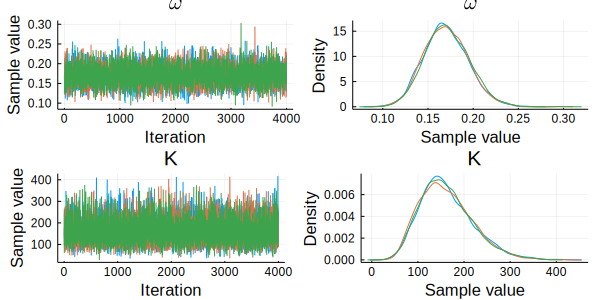

In [11]:
omega = ctrt["ω"]

p1 = plot(omega, title=L"\omega");
p2 = plot(ctrt["K"]);
lyt = @layout([a; b])
plot(p1, p2, layout = lyt, size = (600,300))

In [31]:
#savefig("omega_K_mcmcplot.pdf")

In [12]:
describe(ctrt)

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 2 columns
│ Row │ parameters │ mean     │ std       │ naive_se    │ mcse        │
│     │ Symbol     │ Float64  │ Float64   │ Float64     │ Float64     │
├─────┼────────────┼──────────┼───────────┼─────────────┼─────────────┤
│ 1   │ K          │ 162.133  │ 56.7595   │ 0.518141    │ 0.63928     │
│ 2   │ θ[1]       │ 0.201127 │ 0.0406243 │ 0.000370847 │ 0.000480246 │
│ 3   │ θ[2]       │ 0.177828 │ 0.0339469 │ 0.000309891 │ 0.000396351 │
│ 4   │ θ[3]       │ 0.202856 │ 0.0339457 │ 0.00030988  │ 0.00032879  │
│ 5   │ θ[4]       │ 0.173684 │ 0.0257097 │ 0.000234697 │ 0.000246566 │
│ 6   │ θ[5]       │ 0.120926 │ 0.0232668 │ 0.000212396 │ 0.000269936 │
│ 7   │ ω          │ 0.170483 │ 0.0244486 │ 0.000223184 │ 0.000325197 │

Quantiles

│ Row │ parameters │ 2.5%      │ 25.0%    │ 50.0%    │ 75.0%    │ 97.5%    │
│     │ Symbol     │ Float64   │ Float64  │ Float64  │ Float64  │ Float64  │
├─────┼────────────┼────────

In [21]:
# placebo
@time cpbo = mapreduce(c->sample(binomial_trials(sp, np),
    NUTS(5000,1000,0.65)), chainscat,  1:3);

ωₚ = Array(cpbo["ω"]);  # placebo ω

┌ Info: Found initial step size
│   init_ϵ = 0.8
└ @ Turing.Inference C:\Users\millsjf\.julia\packages\Turing\eIa7P\src\inference\hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=0.4730425193641544), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=0.473)
│   h.metric = DiagEuclideanMetric([0.06877188963877368, 0.106 ...])
└ @ AdvancedHMC C:\Users\millsjf\.julia\packages\AdvancedHMC\PQWco\src\sampler.jl:145
┌ Info: Finished 5000 sampling steps in 6.614984542 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.06877188963877368, 0.106 ...]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=0.473), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 1100.3834126420343
│   average_acceptance_rate = 0.8116726847711558
└ @ AdvancedHMC C:\Users\millsjf\.julia\packages\AdvancedHMC\PQWco\src\sampler.jl:157
┌ Info: Found initial step size
│   i

 23.132743 seconds (68.19 M allocations: 4.585 GiB, 13.42% gc time)


┌ Info: Finished 5000 sampling steps in 5.700526514 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.04689680041740687, 0.103 ...]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=0.6), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 1136.3661357605727
│   average_acceptance_rate = 0.7731213861284832
└ @ AdvancedHMC C:\Users\millsjf\.julia\packages\AdvancedHMC\PQWco\src\sampler.jl:157


In [13]:
δ = ωₜ - ωₚ;           # difference

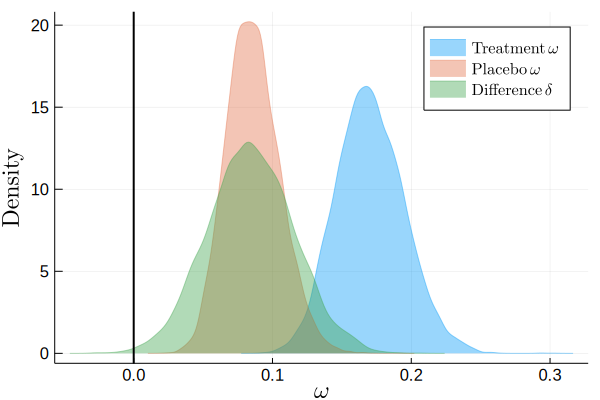

In [14]:
labelstring = latexstring("\\mathrm{Treatment\\, \\omega}")
xlabelstring = latexstring("\\omega")
ylabelstring = latexstring("\\mathrm{Density}")
plot(ωₜ,st=:density,label=labelstring, fill=true, alpha=0.4, ylabel= ylabelstring, xlabel=xlabelstring, 
        legendfontsize = 11, xtickfontsize=11, ytickfontsize=11, xguidefontsize=16, yguidefontsize=16)
labelstring = latexstring("\\mathrm{Placebo\\, \\omega}")
plot!(ωₚ,st=:density,label=labelstring, fill=true, alpha=0.4)
labelstring = latexstring("\\mathrm{Difference\\, \\delta}")
plot!(δ, st=:density, label=labelstring, fill=true, alpha=0.4)
vline!([0.0], label="", linewidth=2, linecolor = :black)

In [20]:
#savefig("treat_pbo_diff2.pdf")

In [22]:
using BayesTesting
# compute mean, SD, 0.95 prob. interval,
# PDR odds and tail prob.
@show([mean(δ) std(δ)]);
@show(quantile(δ,[0.025,0.5,0.975]));
@show([mcodds(δ, h0=0.0) bayespval(δ)]);

[mean(δ) std(δ)] = [0.08440052597296703 0.031040184291005753]
quantile(δ, [0.025, 0.5, 0.975]) = [0.02451971009399239, 0.0839880171647576, 0.14678829569144503]
[mcodds(δ, h0=0.0) bayespval(δ)] = Any[40.918847228312806 (0.00275, 0.0055)]


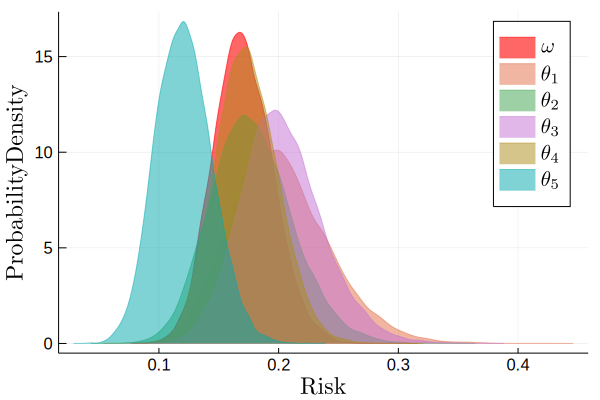

In [16]:
# plot of all thetas and omega
labstr = latexstring("\\omega")
xlabelstring = latexstring("\\mathrm{Risk}")
ylabelstring = latexstring("\\mathrm{Probability Density}")
plt1 = plot(ωₜ, st=:density, fill=true, alpha=0.6, color = :red, ylabel= ylabelstring, xlabel = xlabelstring, label = labstr,
           legendfontsize = 14, xtickfontsize=11, ytickfontsize=11, xguidefontsize=16, yguidefontsize=16)
for i = 1:5
    labstr = latexstring("\\theta_$i")
    theta = Array(ctrt["θ[$i]"])
        plot!(theta, st=:density, label= labstr, fill=true, alpha=0.5)
end
current()


In [62]:
#savefig("thetas_omega.pdf")

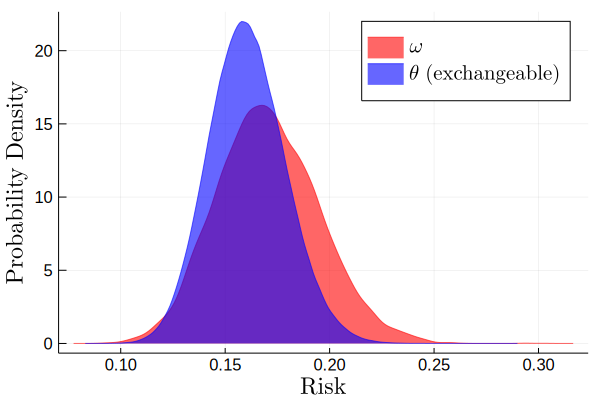

In [17]:
post_theta_exchangeable = rand(Beta(sum(st)+1, sum(nt)-sum(st)+1),10^6);

# exchange (updating) posterior compared to BHM posterior
labstr = latexstring("\\omega")
xlabelstring = latexstring("\\mathrm{Risk}")
ylabelstring = latexstring("\\mathrm{Probability \\; Density}")
plot(ωₜ, st=:density, fill=true, alpha=0.6, color = :red, ylabel= ylabelstring, xlabel = xlabelstring, label = labstr,
           legendfontsize = 14, xtickfontsize=11, ytickfontsize=11, xguidefontsize=16, yguidefontsize=16)
labstr = latexstring("\\theta \\; \\mathrm{(exchangeable)}")
plot!(post_theta_exchangeable, st=:density, fill=true, alpha=0.6, color = :blue, label=labstr)

In [72]:
#savefig("bhm_vs_exc.pdf")